In [1]:
import os
import csv
import pickle
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

In [3]:
MARK_UP_FILES_DIR = os.path.join('..', 'metasessions_module', 'resources', 'mark_up')
LOGS_FILE = os.path.join(MARK_UP_FILES_DIR, 'all_users_2.csv')
OUTPUT_FILE = os.path.join(MARK_UP_FILES_DIR, 'output_2.csv')

In [4]:
os.listdir(MARK_UP_FILES_DIR)

['mark_up.pkl',
 'mark_page.html',
 'all_apps_wide_2020-04-21.csv',
 'output.csv',
 'all_users.csv',
 'output.csv~',
 'FiftyShadesOfGreyMarking_2020-05-17.csv',
 'all_users_2.csv',
 "FiftyShadesOfGreyMarking_ session 'yo387l3m'.html"]

In [5]:
def parse_markup_row(row):
    result = {}
    if row['participant.visited'] == '1':
        result['Dialog'] = row['player.tag_dialog']
        result['Dynamic action'] = row['player.tag_action']
        result['Hot scene'] = row['player.tag_hot_scene']
        result['Musing'] = row['player.tag_musing']
        result['Description'] = row['player.tag_description']
        result['Correspondence'] = row['player.tag_correspondence']
#         result['Delight'] = row['player.tag_delight']
#         result['Sadness'] = row['player.tag_sadness']
        result['Tonality'] = row['player.tonality']
        result['Suspense'] = row['player.suspense']
        result['Additional info'] = str(row['player.additional_info']).replace('\"', ' ').replace('\'', '')
    return result

In [6]:
def load_mark_up():
    mark_up = defaultdict(lambda: [])
    
    with open(LOGS_FILE, 'r') as csv_file:
        reader = csv.DictReader(csv_file)
        for row in reader:
            mark_up[row['participant.id_in_session']].append(parse_markup_row(row))
    
    return mark_up

In [7]:
mark_up = load_mark_up()

In [8]:
mark_up['10'][1]

{'Dialog': '1',
 'Dynamic action': '0',
 'Hot scene': '0',
 'Musing': '1',
 'Description': '0',
 'Correspondence': '0',
 'Tonality': '-1',
 'Suspense': '0',
 'Additional info': ''}

In [11]:
hot_scene = np.zeros(380, dtype=np.bool)
musing = np.zeros(380, dtype=np.bool)
correspondence = np.zeros(380, dtype=np.bool)
action = np.zeros(380, dtype=np.bool)
dialog = np.zeros(380, dtype=np.bool)
description = np.zeros(380, dtype=np.bool)

In [12]:
for fragment_ind, fragment in enumerate(mark_up['10']):
    hot_scene[fragment_ind] = (fragment['Hot scene'] == '1')
    musing[fragment_ind] = (fragment['Musing'] == '1')
    correspondence[fragment_ind] = (fragment['Correspondence'] == '1')
    action[fragment_ind] = (fragment['Dynamic action'] == 1)
    dialog[fragment_ind] = (fragment['Dialog'] == 1)
    description[fragment_ind] = (fragment['Description'] == 1)

In [13]:
def save_via_pickle(obj, filename):
    with open(filename, 'wb') as output_file:
        pickle.dump(obj, output_file)

In [14]:
result_markup = {'musing': musing,
                 'hot_scene': hot_scene,
                 'correspondence': correspondence,
                 'action': action,
                 'dialog': dialog,
                 'description': description}

save_via_pickle(result_markup, os.path.join(MARK_UP_FILES_DIR, 'mark_up.pkl'))

/home/itukh/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

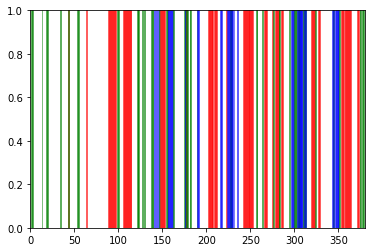

In [64]:
plt.clf()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim(0, 380)
ax.set_ylim(0, 1)
for ind in range(380):
    if hot_scene[ind]:
        ax.add_patch(plt.Rectangle((ind, 0), 1, 1,
                                   fill=True, color='r', alpha=0.5))
    if musing[ind]:
        ax.add_patch(plt.Rectangle((ind, 0), 1, 1,
                                   fill=True, color='g', alpha=0.5))
    if correspondence[ind]:
        ax.add_patch(plt.Rectangle((ind, 0), 1, 1,
                                   fill=True, color='b', alpha=0.5))
fig.show()

In [108]:
def save_mark_up(mark_up):
    with open(OUTPUT_FILE, 'w') as csv_file:
        writer = csv.DictWriter(csv_file, 
                                fieldnames=['Fragment number'] + list(list(mark_up.values())[0][0].keys()),
                                delimiter=',')
        writer.writeheader()
        for player_id, actual_mark_up in mark_up.items():
            for ind, row in enumerate(actual_mark_up):
                row['Fragment number'] = ind
                writer.writerow(row)

In [109]:
save_mark_up(load_mark_up())